In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from polyglot.text import Text
import warnings
warnings.filterwarnings('ignore')

In [106]:
parties = [['pisorgpl', 'Porozumienie__', 'SolidarnaPL'], 
          ['platforma_org', 'Nowoczesna', 'Zieloni', 'inicjatywaPL'], 
          ['KONFEDERACJA_', 'RuchNarodowy', 'Partia_KORWiN'], 
          ['nowePSL', 'kukiz15'],
          ['__Lewica', 'partiarazem']]

parties_flattened = [y for x in parties for y in x]

#parties_flattened

In [107]:
parties_coalitions = [['Prawo i Sprawiedliwość', 'Porozumienie', 'Solidarna Polska'], 
                      ['PlatformaObywatelska', '.Nowoczesna', 'Partia Zieloni 🌻', 'Inicjatywa Polska'], 
                      ['Konfederacja', 'Ruch Narodowy', 'Partia KORWiN'], 
                      ['🍀 PSL', 'KUKIZ15 🇵🇱'], 
                      ['Lewica', 'Razem']]

parties_coalitions_flattened = [y for x in parties_coalitions for y in x]

#parties_coalitions_flattened

In [10]:
def get_sentiment(blob):
    text = Text(blob)
    text.language = 'pl'
    return text.polarity

In [108]:
def plot_sentiment(df_list, coaalition=None, title='', basis='W'):
    fig, ax = plt.subplots(figsize=(16, 6))
    
    for i, df in enumerate(df_list):
        if coaalition and df['name'].iloc[0] not in coalition:
            continue
            
        #df = df[(df.timestamp >= datetime.datetime(2020, 9, 1))]
        
        grp = df.groupby(pd.Grouper(key='timestamp', freq=basis))['sentiment'].mean()
        
        if grp.shape != (0,):
            ax = grp.plot(ax=ax, kind='line', label=parties_names[i], style='.-')
        else:
            print('NOTE: ' + parties_names[i] + ' did not tweet at the given time.')
    
    ax.axhline(y=0, color='k', linestyle='-.')
    
    plt.xlabel('Date')
    plt.ylabel('Sentiment')
    plt.legend(loc='upper right')
    plt.title(title) 
    plt.show()

### TASK 3
#### tweets sentiment

In [99]:
filelist = []
filename_part = 'out/3/tweets_'

for party in parties_flattened:
    filelist.append(filename_part + party + '.csv')

df_list_tweets = [pd.read_csv(file) for file in filelist]

parties_names = []
for i, df in enumerate(df_list_tweets):
    parties_names.append(df['name'].iloc[0])
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #df['tweet'] = df['tweet'].astype(str)
    df['sentiment'] = df['tweet'].apply(get_sentiment)
    print(i, ' - ', df.shape)
    
#df_list_tweets[0].head(20)

0  -  (3117, 8)
1  -  (611, 8)
2  -  (205, 8)
3  -  (3220, 8)
4  -  (423, 8)
5  -  (1594, 8)
6  -  (75, 8)
7  -  (9329, 8)
8  -  (2798, 8)
9  -  (272, 8)
10  -  (1416, 8)
11  -  (46, 8)
12  -  (5578, 8)
13  -  (1977, 8)


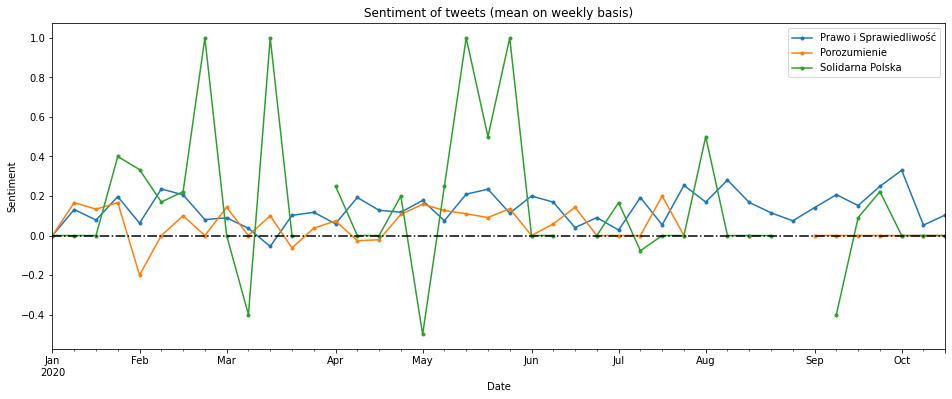

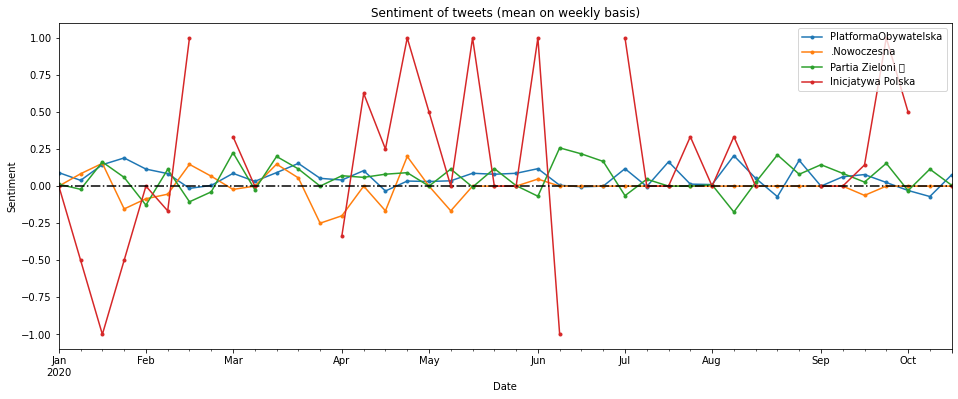

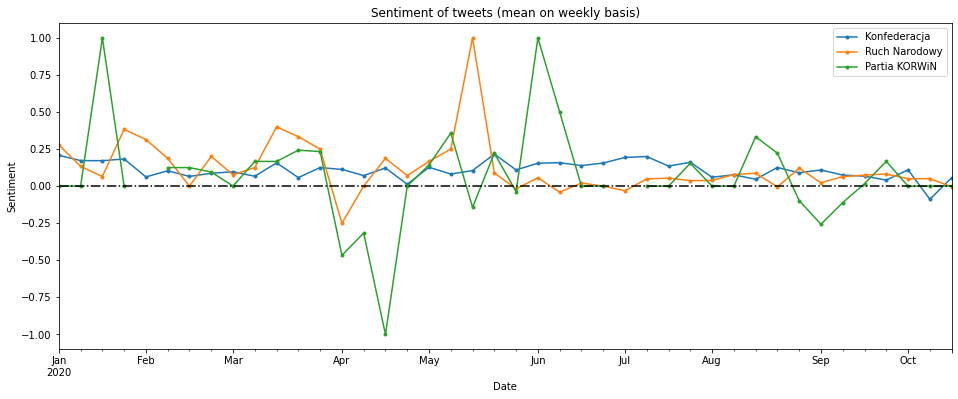

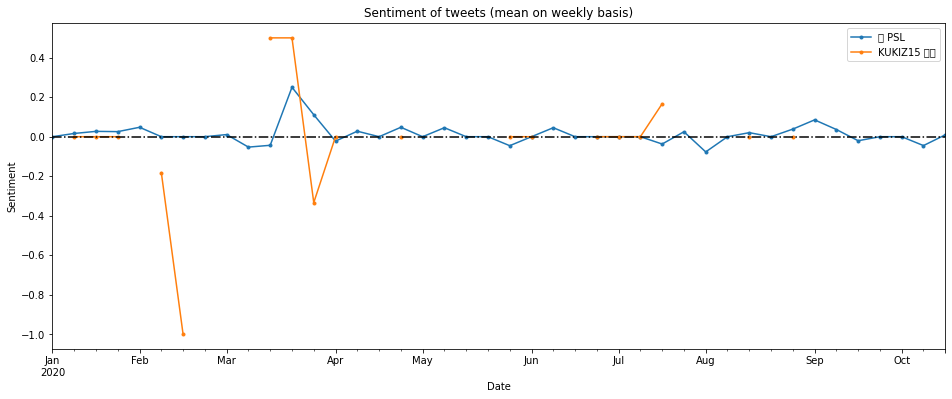

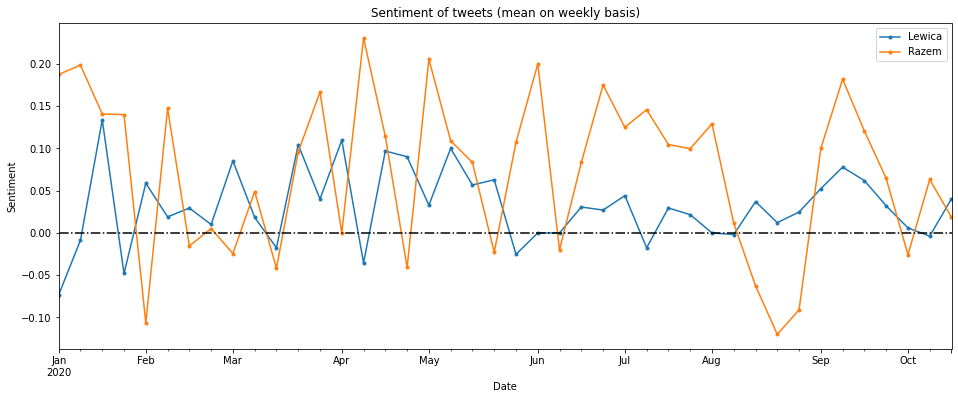

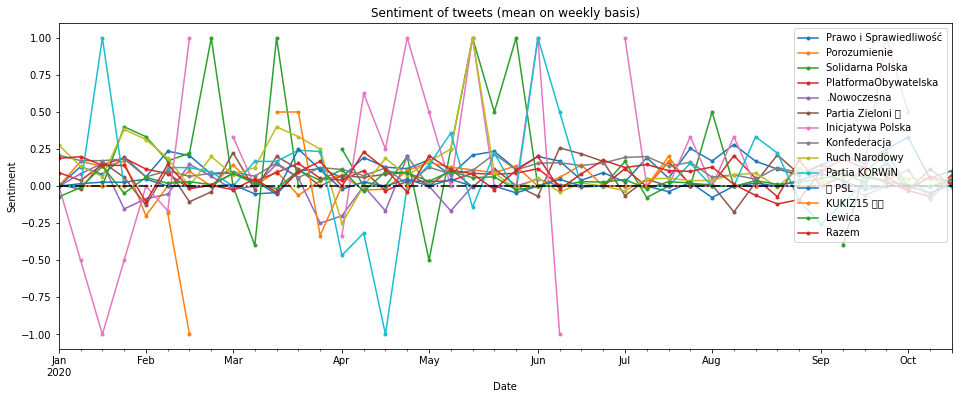

In [105]:
title = 'Sentiment of tweets (mean on weekly basis)'
basis = 'W'

for coalition in parties_coalitions:
    plot_sentiment(df_list_tweets, coalition, title, basis)

plot_sentiment(df_list_tweets, title=title, basis=basis)

#### replies sentiment

In [102]:
filelist = []
filename_part = 'out/3/replies_'

for party in parties_flattened:
    filelist.append(filename_part + party + '.csv')

df_list_replies = [pd.read_csv(file) for file in filelist]

for i, df in enumerate(df_list_replies):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #df['tweet'] = df['tweet'].astype(str)
    df['sentiment'] = df['tweet'].apply(get_sentiment)
    df['name'] = parties_coalitions_flattened[i]
    print(i, ' - ', df.shape)
    
#df_list_replies[0].head(20)

0  -  (9500, 9)
1  -  (73, 9)
2  -  (554, 9)
3  -  (2882, 9)
4  -  (12, 9)
5  -  (346, 9)
6  -  (49, 9)
7  -  (3304, 9)
8  -  (417, 9)
9  -  (52, 9)
10  -  (653, 9)
11  -  (2, 9)
12  -  (2575, 9)
13  -  (1633, 9)


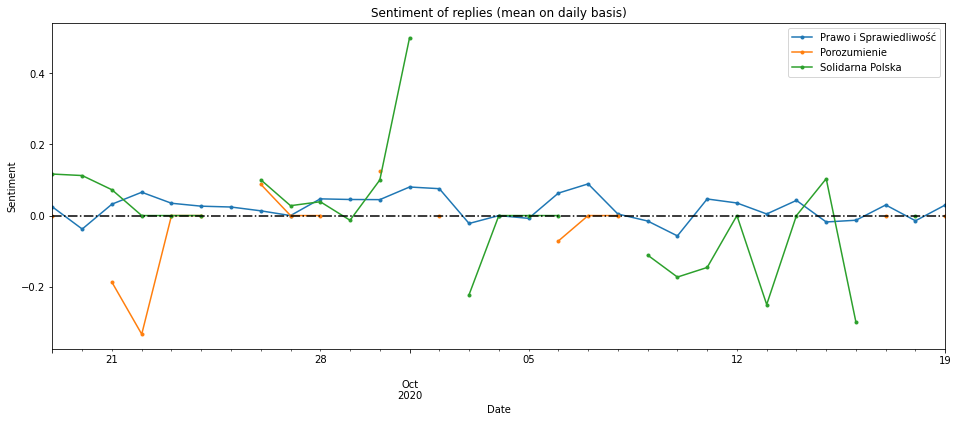

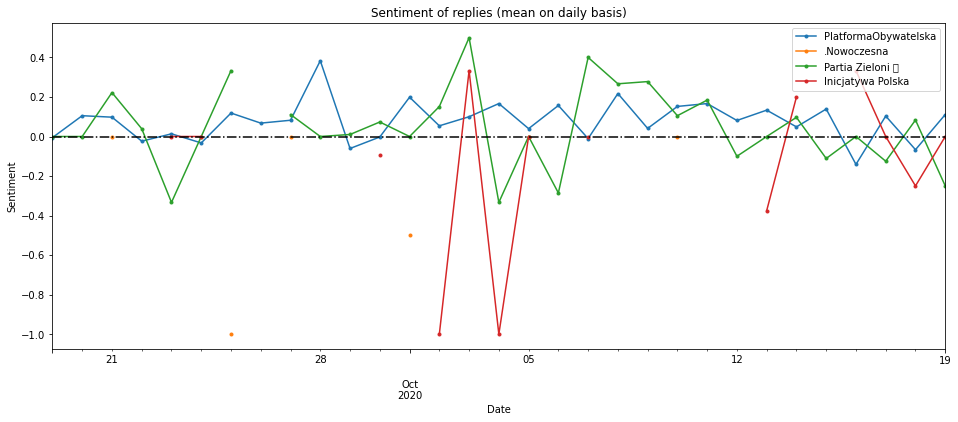

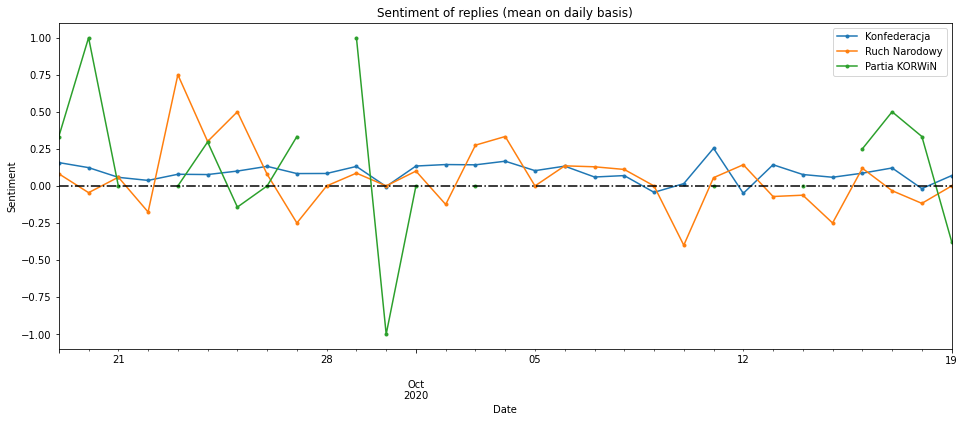

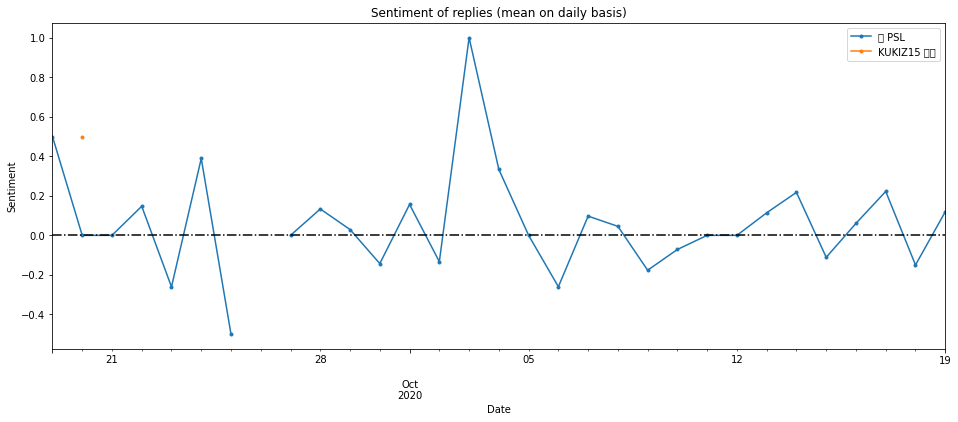

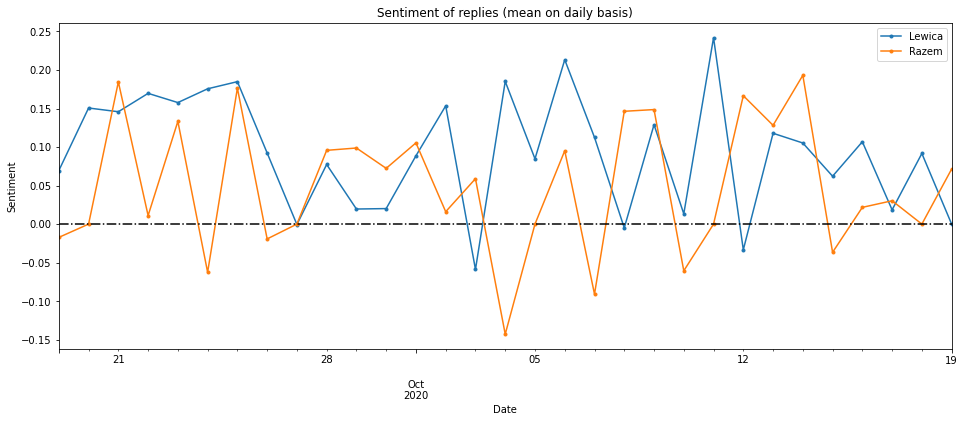

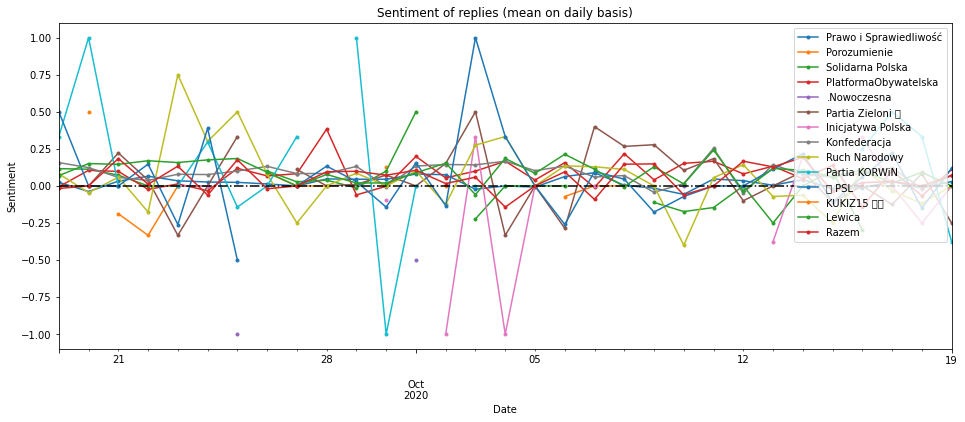

In [104]:
title = 'Sentiment of replies (mean on daily basis)'
basis = 'D'

for coalition in parties_coalitions:
    plot_sentiment(df_list_replies, coalition, title, basis)

plot_sentiment(df_list_replies, title=title, basis=basis)